# **Proyek Sistem Rekomendasi**
- **Nama:** Salsabila Mahiroh
- **Email:** Salsabilammm777@gmail.com
- **ID Dicoding:** salsabilammm


## **Business Understanding**

**Problem Statement**

1. Banyak pengguna kesulitan menemukan produk fashion yang sesuai dengan preferensi mereka karena banyaknya pilihan dan variasi produk seperti merek, kategori, warna, dan ukuran.
2. Pengguna sering tidak mengetahui produk lain yang mungkin disukai berdasarkan riwayat pembelian atau preferensi pengguna lain yang serupa.

**Goal**

1. Membangun sistem rekomendasi yang dapat membantu pengguna menemukan produk fashion yang sesuai dengan preferensi mereka (seperti merek favorit, warna, ukuran, dan kategori produk).
2. Mengembangkan sistem rekomendasi yang mampu memberikan saran produk berdasarkan kesamaan dengan produk yang pernah disukai atau dibeli pengguna lain.

**Solution Statement**

1. **Content-Based Filtering**: Menggunakan fitur seperti *Brand*, dan *Category*, untuk merekomendasikan produk yang mirip dengan produk yang disukai pengguna.
2. **Collaborative Filtering**: Menggunakan data *Rating* yang diberikan oleh pengguna untuk merekomendasikan produk berdasarkan pola preferensi pengguna lain yang memiliki selera serupa.


## **Data Understanding**

Data Understanding digunakan untuk mendapatkan pemahaman dan informasi dari data yang digunakan dan menentukan kualitasnya. Kemudian data akan dilakukan explorasi sebelum melalui tahapan persiapan data (preparation)
- **Nama Dataset** : Fashion Product
- **Sumber Dataset**: Kaggle
- **Link Akses Dataset**: https://www.kaggle.com/datasets/bhanupratapbiswas/fashion-products
- **Fitur :**

| **Nama Kolom** | **Deskripsi Fitur**                                                                  |
| -------------- | -------------------------------------------------------------------------------------- |
| `User ID`      | ID unik dari pengguna yang memberikan rating pada produk.                              |
| `Product ID`   | ID unik dari produk fashion.                                                           |
| `Product Name` | Nama produk fashion, seperti "Dress", "Shoes", "T-shirt", dll.                         |
| `Brand`        | Merek atau brand dari produk, seperti Adidas, H\&M, Zara, dsb.                         |
| `Category`     | Kategori produk fashion, misalnya "Men's Fashion" "Women's Fashion", dan "Kid's Fashion".              |
| `Price`        | Harga produk fashion dalam satuan tertentu .          |
| `Rating`       | Nilai rating yang diberikan pengguna terhadap produk, (1-4) |
| `Color`        | Warna utama dari produk, seperti Black, White, Yellow, dll.                            |
| `Size`         | Ukuran produk, seperti S, M, L, XL.                                                    |


**Dataset Fashion Product**, berisi informasi tentang berbagai produk fashion yang dapat digunakan untuk membangun sistem rekomendasi, terutama di domain e-commerce fashion. Dataset ini cocok untuk use case seperti sistem rekomendasi produk berbasis konten, kolaboratif, maupun hibrida

### **Import Library**

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy.sparse
import math
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from tensorflow.keras import layers, models

### **Data Loading**

Pada bagian ini, file kaggle.json di upload untuk autentikasi ke kaggle, kemudian API key disalin ke direktori yang tepat. Dataset fashion_product.csv diunduh dan diekstrak, kemudia dimuat kedalam variabel df dan membaca menggunakan pandas serta menampilkan lima baris pertama yang akan di tampilkan

In [2]:
# upload fie json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"salsabilamahiroh","key":"83f2c616a0acffeee5c38d0142429ba0"}'}

In [3]:
# Setup API key agar bisa akses Kaggle Dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset dari Kaggle
!kaggle datasets download -d bhanupratapbiswas/fashion-products

# Unzip file dataset
!unzip fashion-products.zip

Dataset URL: https://www.kaggle.com/datasets/bhanupratapbiswas/fashion-products
License(s): other
  0% 0.00/19.7k [00:00<?, ?B/s]
100% 19.7k/19.7k [00:00<00:00, 66.4MB/s]
Archive:  fashion-products.zip
  inflating: fashion_products.csv    


In [4]:
# Membaca file csv
df = pd.read_csv("fashion_products.csv")

# Menampilkan 5 baris pertama
df.head()


,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M


## **Exploratory Data Analysis**

***Memahami struktur dan karakteristik data***

Pada tahap ini EDA, memahami struktur dan karakteristik data (data understanding) yang digunakan untuk mengenali tipe data, mendeteksi nilai yang hilang atau duplikat, melihat adanya outlier, dsb. Tujuannya sebagai dasar dalam pengambilan keputusan untuk analisis selanjutnya.

In [5]:
# melihat ukuran banyaknya data
print(df.shape)

(1000, 9)


In [6]:
# Menampilkan informasi umum tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Product ID    1000 non-null   int64  
 2   Product Name  1000 non-null   object 
 3   Brand         1000 non-null   object 
 4   Category      1000 non-null   object 
 5   Price         1000 non-null   int64  
 6   Rating        1000 non-null   float64
 7   Color         1000 non-null   object 
 8   Size          1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [7]:
# Menampilkan statistik deskriptif untuk kolom numerik
df.describe()

,User ID,Product ID,Price,Rating
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,50.41900,500.500000,55.785000,2.993135
std,28.78131,288.819436,26.291748,1.153185
min,1.00000,1.000000,10.000000,1.000967
25%,26.00000,250.750000,33.000000,1.992786
50%,50.00000,500.500000,57.000000,2.984003
75%,75.00000,750.250000,78.250000,3.985084
max,100.00000,1000.000000,100.000000,4.987964


**Insight :**
- Tidak terdapat missing value atau nilai hilang pada data fashion_product.csv
- Tidak terdapat duplikasi data pada data fashion_product.csv
- Rata-rata harga produk adalah 55.785, dengan harga terendah berada di harga 10.000, dan harga tertinggi di harga 100.000
- Rata-rata rating yang diberikan pengguna adalah 2, dengan rating terendah berada diskala 1 dan rating tertinggi berada diskala 4

In [8]:
# Menampilkan missing values
df.isna().sum()

,0
User ID,0
Product ID,0
Product Name,0
Brand,0
Category,0
Price,0
Rating,0
Color,0
Size,0


In [9]:
# Menampilkan data duplikat
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


***Memahami variabel data***

Jumlah produk dan nama produk:  5

Jumlah produk per nama produk:
  Product Name  Count
0        Jeans    231
1        Shoes    222
2      T-shirt    201
3        Dress    176
4      Sweater    170


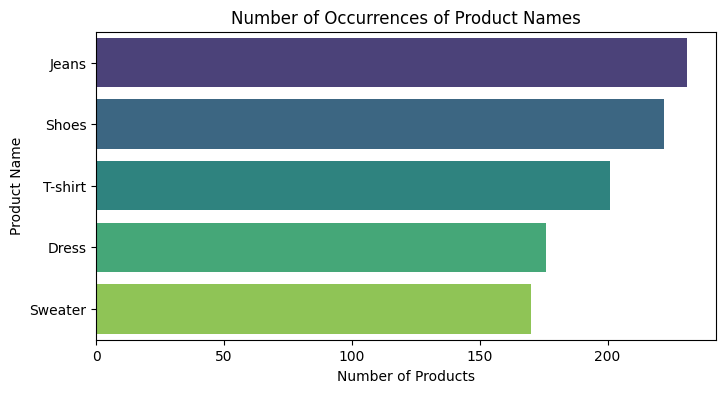

In [10]:
# melihat jumlah nama produk
print("Jumlah produk dan nama produk: ", df['Product Name'].nunique())

# Menampilkan jumlah produk per nama produk
productname_counts = df['Product Name'].value_counts().reset_index()
productname_counts.columns = ['Product Name', 'Count']
print("\nJumlah produk per nama produk:")
print(productname_counts)

# menampilkan dalam bentuk grafik
plt.figure(figsize=(8, 4))
sns.barplot(data=productname_counts, y='Product Name', x='Count', hue='Product Name', palette='viridis', legend=False)
plt.title('Number of Occurrences of Product Names')
plt.xlabel('Number of Products')
plt.ylabel('Product Name')
plt.show()

**Insight** :
- Produk dengan jenis produk terbanyak adalah "Jeans" yaitu 231 produk Jeans
- Dan jenis produk "Sweater" memiliki jumlah yang paling sedikit yaitu 170 produk Sweater

Jumlah kategori brand:  5

Jumlah produk per brand:
    Brand  Count
0    Nike    214
1    Zara    203
2  Adidas    198
3     H&M    194
4   Gucci    191


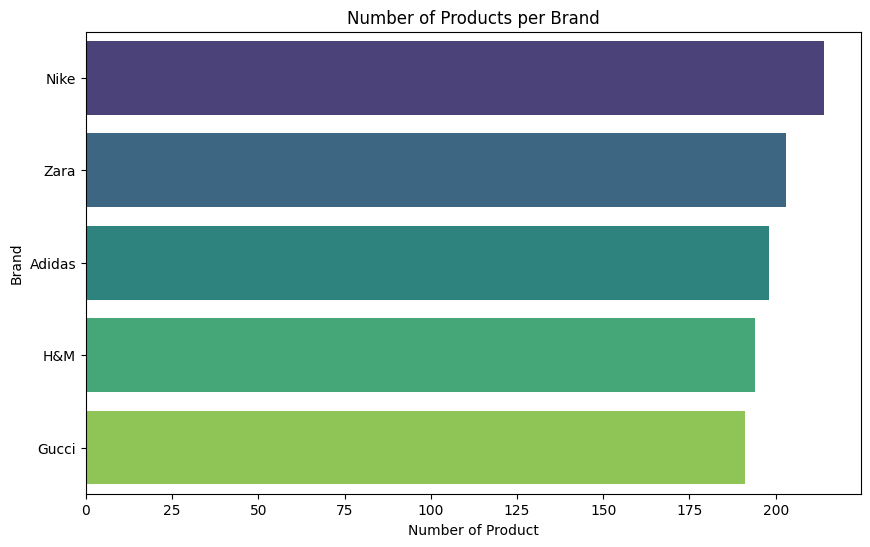

In [11]:
# melihat jumlah jenis brand
print("Jumlah kategori brand: ", df['Brand'].nunique())

# Menampilkan jumlah produk per brand
brand_counts = df['Brand'].value_counts().reset_index()
brand_counts.columns = ['Brand', 'Count']
print("\nJumlah produk per brand:")
print(brand_counts)

# menampilkan jumlah produk per brand dalam bentuk grafik
plt.figure(figsize=(10, 6))
sns.barplot(data=brand_counts, y='Brand', x='Count', hue='Brand', palette='viridis', legend=False)
plt.title('Number of Products per Brand')
plt.xlabel('Number of Product')
plt.ylabel('Brand')
plt.show()

**Insight** :
- Produk dengan merek atau brand terbanyak adalah "Nike" yaitu 214 kategori produk
- Dan merek atau brand "Gucci" memiliki jumlah yang paling sedikit yaitu 191 saja

Jumlah jenis kategori:  3

Jumlah produk per kategori:
          Category  Count
0    Kids' Fashion    351
1  Women's Fashion    327
2    Men's Fashion    322


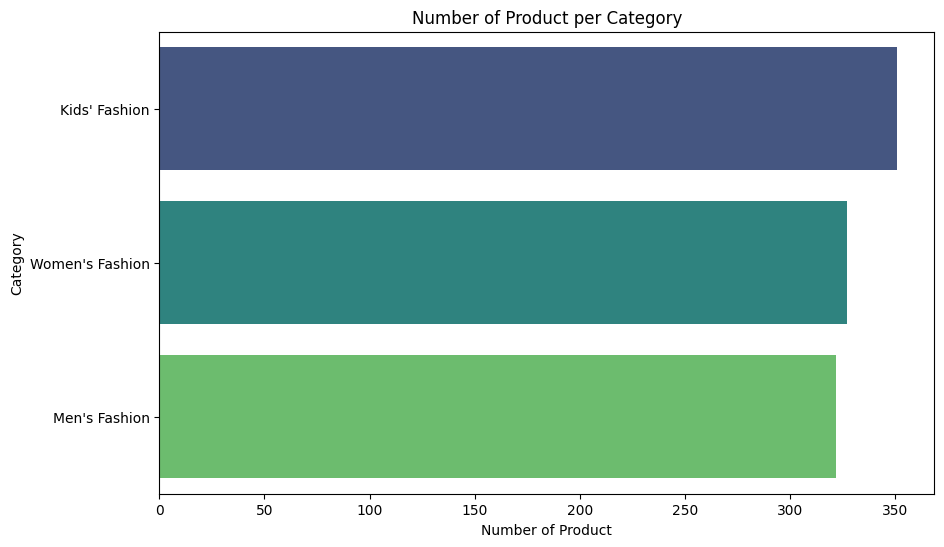

In [12]:
# melihat jumlah jenis kategori
print("Jumlah jenis kategori: ", df['Category'].nunique())

# Menampilkan jumlah produk per kategori
category_counts = df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']
print("\nJumlah produk per kategori:")
print(category_counts)

# menampilkan jumlah produk per kategori dalam bentuk grafik
plt.figure(figsize=(10, 6))
sns.barplot(data=category_counts, y='Category', x='Count', hue='Category', palette='viridis', legend=False)
plt.title('Number of Product per Category')
plt.xlabel('Number of Product')
plt.ylabel('Category')
plt.show()

**Insight** :
- Produk dengan kategori terbanyak adalah "Kid's Fashion" yaitu 351 kategori produk
- Dan kategori produk "Men's Fashion" memiliki jumlah yang paling sedikit yaitu 322 kategori produk

Jumlah jenis warna:  6

Jumlah produk per warna:
    Color  Count
0   White    193
1  Yellow    175
2    Blue    172
3   Green    156
4   Black    154
5     Red    150


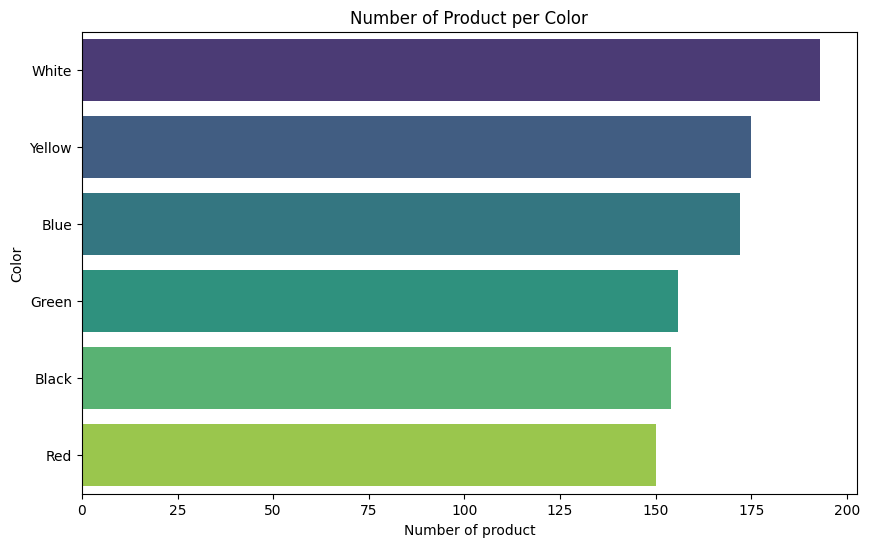

In [13]:
# melihat jumlah jenis warna
print("Jumlah jenis warna: ", df['Color'].nunique())

# Menampilkan jumlah produk per warna
color_counts = df['Color'].value_counts().reset_index()
color_counts.columns = ['Color', 'Count']
print("\nJumlah produk per warna:")
print(color_counts)

# menampilkan jumlah produk per warna dalam bentuk grafik
plt.figure(figsize=(10, 6))
sns.barplot(data=color_counts, y='Color', x='Count', hue='Color', palette='viridis', legend=False)
plt.title('Number of Product per Color')
plt.xlabel('Number of product')
plt.ylabel('Color')
plt.show()

**Insight** :
- Produk dengan warna terbanyak adalah jenis warna "White" yaitu 193 produk
- Dan jenis warna "Red" memiliki jumlah yang paling sedikit dalam warna produk fashion ini yaitu 150

Jumlah jenis ukuran:  4

Jumlah produk per ukuran:
  Size  Count
0   XL    254
1    L    251
2    S    249
3    M    246


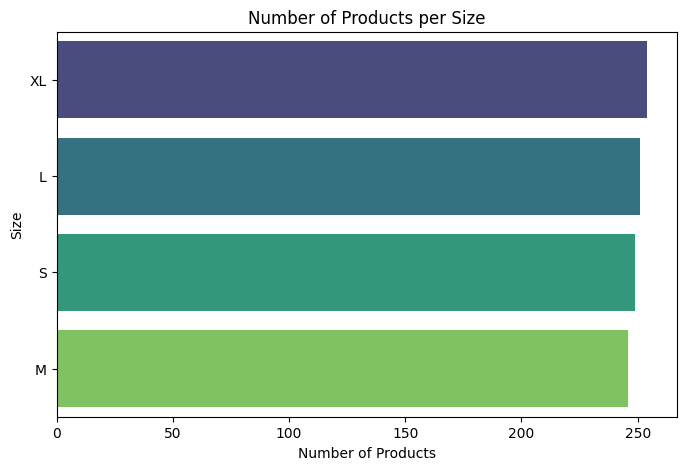

In [14]:
# melihat jumlah jenis ukuran
print("Jumlah jenis ukuran: ", df['Size'].nunique())

# Menampilkan jumlah produk per ukuran
size_counts = df['Size'].value_counts().reset_index()
size_counts.columns = ['Size', 'Count']
print("\nJumlah produk per ukuran:")
print(size_counts)

# menampilkan jumlah produk per ukuran dalam bentuk grafik
plt.figure(figsize=(8, 5))
sns.barplot(data=size_counts, y='Size', x='Count', hue='Size', palette='viridis', legend=False)
plt.title('Number of Products per Size')
plt.xlabel('Number of Products')
plt.ylabel('Size')
plt.show()

**Insight** :
- Produk dengan ukuran atau size terbanyak ada pada jenis size "XL" yaitu 254
- Dan jenis ukuran M memiliki nilai yang paling sedikit dalam produk fashion ini yaitu 246

***EDA untuk Content based filtering***

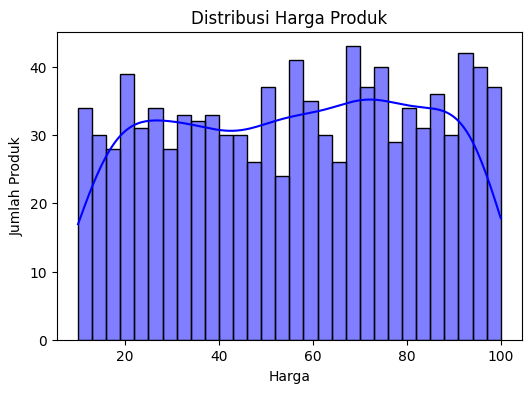

In [15]:
# melihat distribusi harga produk
plt.figure(figsize=(6,4))
sns.histplot(df['Price'], bins=30, kde=True, color='blue')
plt.title('Distribusi Harga Produk')
plt.xlabel('Harga')
plt.ylabel('Jumlah Produk')
plt.show()


**Insight :**

- Harga produk memiliki distribusi yang tersebar cukup merata di seluruh rentang harga, yaitu sekitar 10 hingga 100.

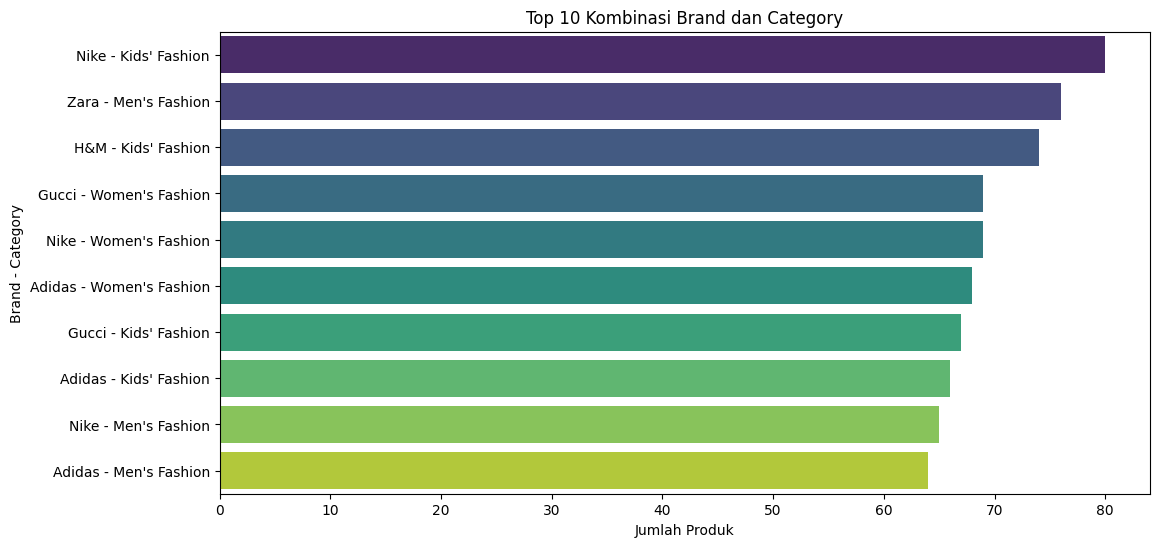

In [16]:
# melihat keragaman produk berdasarkan kombinasi fitur brand dan category
df['brand_cat'] = df['Brand'] + ' - ' + df['Category']
brand_cat_counts = df['brand_cat'].value_counts().reset_index()
brand_cat_counts.columns = ['Brand-Category', 'Count']
plt.figure(figsize=(12, 6))
sns.barplot(data=brand_cat_counts.head(10), x='Count', y='Brand-Category', palette='viridis', hue='Brand-Category', legend=False),
plt.title('Top 10 Kombinasi Brand dan Category')
plt.xlabel('Jumlah Produk')
plt.ylabel('Brand - Category')
plt.show()


**Insight** :
- Kombinasi brand dan kategori produk  "Nike - Kids' Fashion" menempati urutan pertama dalam 10 top utama kombinasi brand dan category produk, artinya brand dengan merek *Nike* dan kategori produk *kid's fashion* menunjukan brand dan kategori produk terlaris.


***EDA untuk Collaborative Filtering***

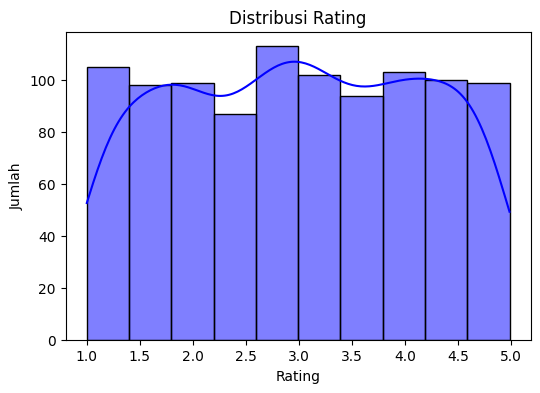

In [17]:
# melihat apakah data rating bias
plt.figure(figsize=(6,4))
sns.histplot(df['Rating'], bins=10, kde=True, color='blue')
plt.title('Distribusi Rating')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()


**Insight :**

- Rating memiliki istribusi cenderung merata, dan tidak terdapat bias terhadaop rating yang artinya data tidak skewed, sehingga menunjukkan positif untuk dilakukan dengan pendekatan collaborative filtering

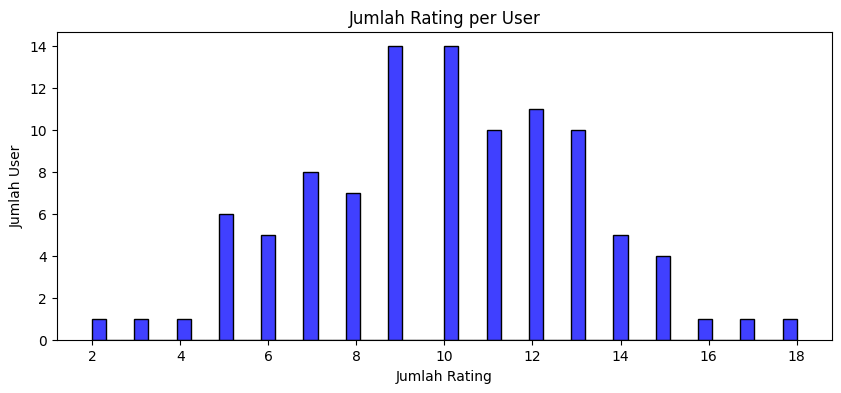

In [18]:
# melihat apakah cukup banyak interaksi untuk collaborative filtering
# melihat berapa banyak jumlah rating yang diberikan oleh user
rating_per_user = df.groupby('User ID')['Rating'].count().reset_index().sort_values(by='Rating', ascending=False)
plt.figure(figsize=(10, 4))
sns.histplot(rating_per_user['Rating'], bins=50, color='blue')
plt.title('Jumlah Rating per User')
plt.xlabel('Jumlah Rating')
plt.ylabel('Jumlah User')
plt.show()


**Insight** :

- Sebagian besar user memberikan sekitar 9 hingga 13 rating, dengan puncaknya di angka 9 dan 10. Hal ini mengindikasikan bahwa sebagian besar user cukup aktif, yang merupakan kondisi yang baik untuk membangun sistem rekomendasi berbasis collaborative filtering.


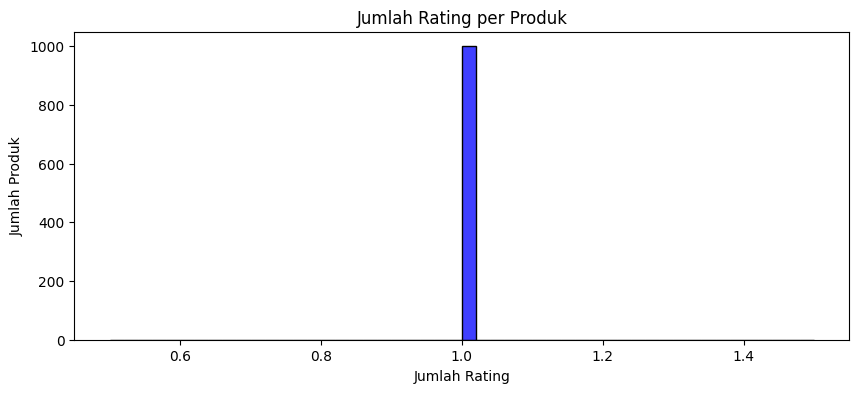

In [19]:
# melihat apakah ada produk yang jarang di review
rating_per_product = df.groupby('Product ID')['Rating'].count().reset_index().sort_values(by='Rating', ascending=False)
plt.figure(figsize=(10, 4))
sns.histplot(rating_per_product['Rating'], bins=50, color='blue')
plt.title('Jumlah Rating per Produk')
plt.xlabel('Jumlah Rating')
plt.ylabel('Jumlah Produk')
plt.show()


**Insight :**

- Dalam memberikan rating di setiap produk, hampir semua produk hanya menerima satu rating dari user

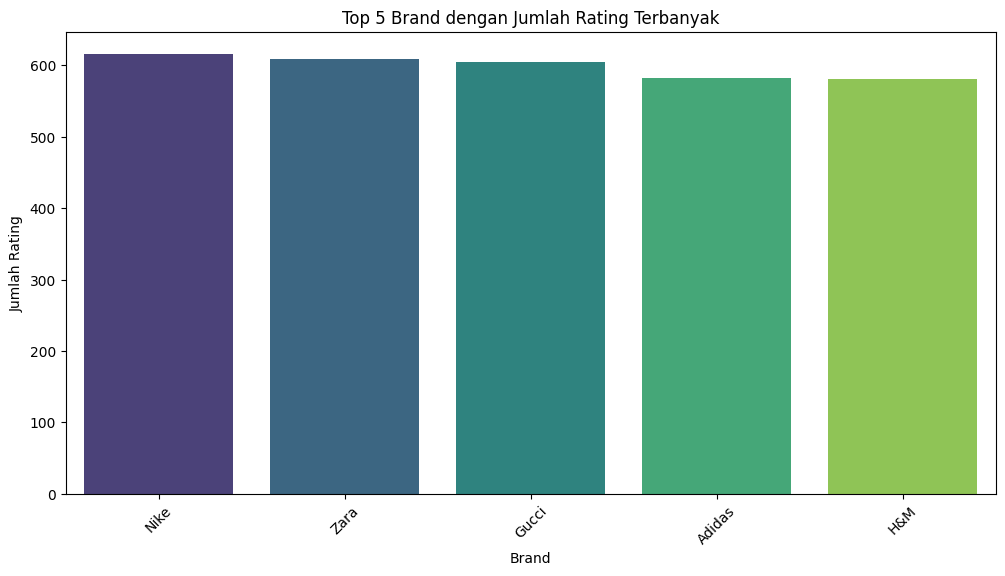

In [20]:
# Mengambil 5 brand berdasarkan jumlah rating
jumlah_rating_per_brand = df.groupby('Brand')['Rating'].sum()
top_brand = jumlah_rating_per_brand.sort_values(ascending=False).head(10).reset_index()
top_brand.columns = ['Brand', 'Rating']

# Distribusi 5 brand dengan jumlah rating terbanyak
plt.figure(figsize=(12, 6))
sns.barplot(data=top_brand, x='Brand', y='Rating', hue='Brand', palette='viridis', legend=False)
plt.title('Top 5 Brand dengan Jumlah Rating Terbanyak')
plt.xlabel('Brand')
plt.ylabel('Jumlah Rating')
plt.xticks(rotation=45)
plt.show()

**Insight :**

- Terdapat 5 brand dalam product fashion (Nike, Zara, Gucci, Adidas, dan H&M)
- Brand dengan rating tertinggi adalah "Nike" dan brand dengan rating terendah adalah produk dengan brand "H&M"

## **Data Preparation**

**Preparation untuk Content Based Filtering**

Melakukan teknik TF-IDF Vectorizer yang digunakan untuk mengubah data brand_cat menjadi representasi numerik. Dengan menghitung IDF dari setiap kata, data dikonversi ke matriks TF-IDF yang mencerminkan pentingnya kata dalam kategori merek produk. Matriks ini kemudian diubah menjadi DataFrame dengan baris Product ID dan kolom fitur, sehingga mempermudah analisis kemiripan antar produk dalam sistem rekomendasi.

In [21]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data cuisine
tf.fit(df['brand_cat'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['adidas', 'fashion', 'gucci', 'kids', 'men', 'nike', 'women',
       'zara'], dtype=object)

In [22]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(df['brand_cat'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(1000, 8)

In [23]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.74327226, 0.28418524, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.42732075, 0.        , ..., 0.        , 0.90410009,
         0.        ],
        [0.74523804, 0.28493684, 0.        , ..., 0.        , 0.6028526 ,
         0.        ],
        ...,
        [0.        , 0.28567947, 0.        , ..., 0.        , 0.        ,
         0.74009116],
        [0.        , 0.28644302, 0.        , ..., 0.        , 0.60603929,
         0.74206925],
        [0.74523804, 0.28493684, 0.        , ..., 0.        , 0.6028526 ,
         0.        ]])

In [24]:
# Membuat dataframe TF-IDF dengan baris berupa id produk dan kolom berupa brand_cat
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=df['Product ID']
).sample(min(22, tfidf_matrix.shape[1]), axis=1).sample(min(20, tfidf_matrix.shape[0]), axis=0)

,adidas,zara,men,nike,kids,fashion,women,gucci
Product ID,,,,,,,,
114,0.000000,0.000000,0.905288,0.000000,0.000000,0.424798,0.000000,0.000000
586,0.000000,0.000000,0.000000,0.744429,0.599834,0.293300,0.000000,0.000000
93,0.000000,0.000000,0.615616,0.733191,0.000000,0.288872,0.000000,0.000000
458,0.000000,0.000000,0.000000,0.000000,0.585236,0.286162,0.000000,0.758689
302,0.000000,0.000000,0.000000,0.000000,0.585236,0.286162,0.000000,0.758689
163,0.000000,0.000000,0.000000,0.735195,0.000000,0.289662,0.612849,0.000000
169,0.000000,0.740091,0.608812,0.000000,0.000000,0.285679,0.000000,0.000000
627,0.743272,0.000000,0.605628,0.000000,0.000000,0.284185,0.000000,0.000000
982,0.000000,0.000000,0.000000,0.744429,0.599834,0.293300,0.000000,0.000000


**Insight :**

- Hasil TF-IDF Vectorizer menghasilkan matriks berukuran 1000×8, merepresentasikan 1000 produk dan 8 kategori (adidas, fashion, gucci, kids, men, nike, women, zara).
- Setiap nilai dalam matriks menunjukkan tingkat relevansi sebuah produk terhadap kategori tertentu.

**Preparation untuk Collaborative Filtering**

Melakukan LabelEncoder untuk mengubah brand_cat dan Product ID ke bentuk numerik. Interaction matrix dibuat dari rating, lalu dihitung sparsity-nya. Data kemudian dipisah menjadi train dan test untuk pelatihan model.

In [25]:
# Membuat instance LabelEncoder untuk mengubah nilai kategori menjadi angka
brand_cat_encoder = LabelEncoder()
product_encoder = LabelEncoder()

# Mengubah kolom 'brand_cat' & 'Product ID' menjadi representasi numerik
df['brand_cat_encoded'] = brand_cat_encoder.fit_transform(df['brand_cat'])
df['product_encoded'] = product_encoder.fit_transform(df['Product ID'])

# Menampilkan jumlah unik setelah encoding
print("Jumlah brand_cat:", len(brand_cat_encoder.classes_))
print("Jumlah Produk:", len(product_encoder.classes_))

Jumlah brand_cat: 15
Jumlah Produk: 1000


In [26]:
# Membuat interaction matrix antara brandcat dan produkID berdasarkan rating
interaction_matrix = df.pivot(index='brand_cat_encoded', columns='product_encoded', values='Rating').fillna(0)

# Menghitung tingkat sparsity (seberapa banyak nilai 0 dalam matrix)
sparsity = 1 - np.count_nonzero(interaction_matrix) / float(interaction_matrix.size)

# Menampilkan hasil sparsity dalam format desimal 4 angka di belakang koma
print(f"Data sparsity: {sparsity:.4f}")

Data sparsity: 0.9333


In [27]:
# Menyusun fitur (X) dari kolom brand_cat_encoded dan product_encoded
X = df[['brand_cat_encoded', 'product_encoded']].values

# Menyusun target (y) dari kolom rating
y = df['Rating'].values

# Membagi data menjadi data latih (train) dan data uji (test) dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan bentuk (jumlah baris dan kolom) dari data train dan test
print(f"Data Train: {X_train.shape}, Data Test: {X_test.shape}")

Data Train: (800, 2), Data Test: (200, 2)


**Insight :**

- Terdapat 15 kategori brand dan 1000 produk.
- Interaction matrix yang terbentuk memiliki sparsity sebesar 0.9333, menunjukkan banyaknya data kosong. Data dibagi menjadi 800 data latih dan 200 data uji.

## **Model Development**

***Modeling dengan Content Based Filtering***

- Melakukan teknik dengan *Cosine Similarity*.
- Cosine similarity dihitung dari TF-IDF matrix untuk mengukur kemiripan antar produk.

In [28]:
# Menghitung cosine similarity antar semua item berdasarkan TF-IDF matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Menampilkan ukuran (shape) dari matriks cosine similarity
print("Cosine Similarity Matrix Shape:", cosine_sim.shape)

Cosine Similarity Matrix Shape: (1000, 1000)


**Insight :**

- Hasil cosine similarity berupa matriks berukuran (1000, 1000) yang menunjukkan tingkat kemiripan setiap produk dengan produk lainnya.

**Mendapatkan rekomendasi produk fashion**

Sistem rekomendasi ini menggunakan cosine similarity dari TF-IDF untuk mencari produk mirip berdasarkan kategori (brand_cat). Pengguna memasukkan brand_cat yang di inginkan, kemudian sistem menampilkan produk pertama dan 5 rekomendasi teratas. Evaluasi model dilakukan dengan menghitung rata-rata MSE dan RMSE dari skor similarity terhadap relevansi aktual. Outputnya adalah detail produk, rekomendasi produk, dan hasil evaluasi model.

In [29]:
# Fungsi untuk mengambil detail produk berdasarkan brand_cat
def get_product_details_by_brand_cat(brand_cat, df):
    filtered_df = df[df['brand_cat'] == brand_cat]
    if filtered_df.empty:
        raise ValueError(f"Produk dengan brand_cat '{brand_cat}' tidak ditemukan.")
    return filtered_df[['Product ID', 'Product Name', 'Brand', 'Category', 'Color', 'Size']]

# Fungsi untuk merekomendasikan produk berdasarkan brand_cat similarity
def recommend_products_by_brand_cat(brand_cat, df, similarity_matrix, top_n=5):
    product_indices = df[df['brand_cat'] == brand_cat].index
    if product_indices.empty:
        raise ValueError(f"Produk dengan brand_cat '{brand_cat}' tidak ditemukan.")

    # Ambil indeks produk pertama dengan brand_cat tersebut sebagai acuan
    product_idx = product_indices[0]

    # Ambil skor similarity untuk produk tersebut
    sim_scores = list(enumerate(similarity_matrix[product_idx]))

    # Urutkan berdasarkan skor similarity tertinggi dan ambil top_n
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n + 1]  # skip index 0 (produk itu sendiri)

    # Ambil indeks produk yang direkomendasikan
    recommended_indices = [i[0] for i in sim_scores]
    recommended_products = df.iloc[recommended_indices].copy()

    # Filter hanya produk dengan brand_cat yang sama
    recommended_products = recommended_products[recommended_products['brand_cat'] == brand_cat]

    # Pilih kolom yang relevan
    recommended_products = recommended_products[['Product ID', 'Product Name', 'Brand', 'Category', 'Color', 'Size']]
    return recommended_products

In [30]:
# Fungsi untuk menghitung Mean Squared Error (MSE) dan Root Mean Squared Error (RMSE) dari prediksi dan data relevansi aktual
def calculate_mse_rmse(predictions, actual_relevance):
    mse = mean_squared_error(actual_relevance, predictions)
    rmse = np.sqrt(mse)
    return mse, rmse

# Fungsi untuk mengambil skor cosine similarity dari produk berdasarkan brand_cat terhadap semua produk lain
def get_cosine_similarity_scores_by_brand_cat(brand_cat, df, similarity_matrix):
    # Cari indeks produk pertama yang punya brand_cat sesuai input
    product_indices = df[df['brand_cat'] == brand_cat].index
    if product_indices.empty:
        raise ValueError(f"brand_cat '{brand_cat}' tidak ditemukan dalam dataset.")
    product_idx = product_indices[0]

    sim_scores = similarity_matrix[product_idx]
    return sim_scores

# Fungsi untuk mengubah skor similarity menjadi nilai relevansi aktual berdasarkan ambang batas threshold
def get_actual_relevance(sim_scores, threshold=0.5):
    return [1 if score >= threshold else 0 for score in sim_scores]

In [31]:
# Fungsi untuk menghitung rata-rata MSE dan RMSE dari semua brand_cat berdasarkan skor similarity dan relevansi aktual
def calculate_mse_rmse_for_all_by_brand_cat(df, similarity_matrix, top_n=5):
    all_mse = []
    all_rmse = []

    # Loop melalui setiap brand_cat unik di dataset
    for brand_cat in df['brand_cat'].unique():
        try:
            # Ambil skor cosine similarity untuk produk pertama dengan brand_cat tersebut
            sim_scores = get_cosine_similarity_scores_by_brand_cat(brand_cat, df, similarity_matrix)
            # Buat label relevansi aktual berdasarkan threshold default
            actual_relevance = get_actual_relevance(sim_scores)

            if len(sim_scores) == 0:
                continue

            # Hitung MSE dan RMSE hanya untuk top_n produk teratas yang paling mirip
            mse, rmse = calculate_mse_rmse(sim_scores[:top_n], actual_relevance[:top_n])
            all_mse.append(mse)
            all_rmse.append(rmse)

        except (ValueError, IndexError) as e:
            # Tangani error jika brand_cat tidak ditemukan atau indeks bermasalah, lalu lanjut ke brand_cat berikutnya
            print(f"Error processing brand_cat {brand_cat}: {e}")
            continue

    # Kembalikan rata-rata MSE dan RMSE dari semua brand_cat yang berhasil diproses
    return np.mean(all_mse), np.mean(all_rmse)

In [32]:
# Meminta user memasukkan brand_cat secara interaktif
brand_cat_input = input("Masukkan brand_cat: ")

# Fungsi untuk mengambil detail produk pertama berdasarkan brand_cat
def get_product_details_by_brand_cat(brand_cat, df):
    filtered = df[df['brand_cat'] == brand_cat]
    if filtered.empty:
        raise ValueError(f"brand_cat {brand_cat} tidak ditemukan dalam dataset.")
    # Ambil produk pertama untuk detailnya
    input_product = filtered.iloc[[0]][['Product ID', 'Product Name', 'Brand', 'Category', 'Color', 'Size', 'brand_cat']]
    return input_product

# Fungsi untuk merekomendasikan produk mirip berdasarkan produk pertama dari brand_cat input
def recommend_products_by_brand_cat(brand_cat, df, similarity_matrix, top_n=5):
    filtered = df[df['brand_cat'] == brand_cat]
    if filtered.empty:
        raise ValueError(f"brand_cat {brand_cat} tidak ditemukan dalam dataset.")
    product_idx = filtered.index[0]

    # Ambil skor similarity produk pertama dengan produk lain
    sim_scores = list(enumerate(similarity_matrix[product_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n + 1]

    product_indices = [i[0] for i in sim_scores]
    recommended_products = df.iloc[product_indices].copy()

    recommended_products = recommended_products[['Product ID', 'Product Name', 'Brand', 'Category', 'Color', 'Size', 'brand_cat']]
    return recommended_products

# Ambil detail produk berdasarkan brand_cat input user
input_product = get_product_details_by_brand_cat(brand_cat_input, df)

# Ambil daftar produk rekomendasi berdasarkan brand_cat input user
recommended_products = recommend_products_by_brand_cat(brand_cat_input, df, cosine_sim)

print("Input Produk")
input_product = input_product.reset_index(drop=True)
display(input_product)

print("\nTop 5 Rekomendasi Produk:")
recommended_products = recommended_products.reset_index(drop=True)
display(recommended_products)

Masukkan brand_cat: Nike - Women's Fashion
Input Produk


,Product ID,Product Name,Brand,Category,Color,Size,brand_cat
0,56,Dress,Nike,Women's Fashion,White,XL,Nike - Women's Fashion



Top 5 Rekomendasi Produk:


,Product ID,Product Name,Brand,Category,Color,Size,brand_cat
0,81,T-shirt,Nike,Women's Fashion,Green,S,Nike - Women's Fashion
1,83,Shoes,Nike,Women's Fashion,Blue,L,Nike - Women's Fashion
2,85,Shoes,Nike,Women's Fashion,Yellow,XL,Nike - Women's Fashion
3,123,Sweater,Nike,Women's Fashion,Yellow,L,Nike - Women's Fashion
4,130,Shoes,Nike,Women's Fashion,Green,M,Nike - Women's Fashion


In [33]:
# Menghitung rata-rata MSE dan RMSE untuk semua produk menggunakan matriks cosine similarity
avg_mse, avg_rmse = calculate_mse_rmse_for_all_by_brand_cat(df, cosine_sim)

# Menampilkan hasil evaluasi performa model rekomendasi secara keseluruhan
print(f"Rata-rata MSE pada seluruh produk: {avg_mse:.4f}")
print(f"Rata-rata RMSE pada seluruh produk: {avg_rmse:.4f}")

Rata-rata MSE pada seluruh produk: 0.0642
Rata-rata RMSE pada seluruh produk: 0.2400


**Insight :**

- Hasil rekomendasi produk untuk kategori Nike - Women's Fashion menampilkan produk utama berupa Dress dari Nike dengan warna putih dan ukuran XL.
- Sistem merekomendasikan 5 produk serupa dalam kategori yang sama, seperti T-shirt, Shoes, dan Sweater dengan berbagai warna dan ukuran.
- Rata-rata MSE dan RMSE model rekomendasi berbasis cosine similarity masing-masing 0.0642 dan 0.2400, menunjukkan akurasi prediksi yang baik.

***Modeling dengan Collaborative Filtering***

**Training Model**

Dalam melakukan training model untuk collaborative filtering, model embedding dengan dimensi 100 dibuat untuk input brand_cat dan product, masing-masing diubah menjadi vektor dense dan bias embedding. Vektor ini digabung dan diproses lewat beberapa dense layer dengan ReLU dan dropout untuk menghindari overfitting. Output model adalah prediksi rating dengan penambahan bias. Model dikompilasi menggunakan optimizer Adam dan loss MSE, lalu dilatih selama 100 epoch dengan batch size 64. Grafik loss training dan validasi ditampilkan untuk evaluasi performa.

In [34]:
# Dimensi embedding
embedding_dim = 100

# Input layer untuk brand_cat dan produk yang masing-masing berupa satu indeks numerik
brand_cat_input = layers.Input(shape=(1,), name='brand_cat_input')
product_input = layers.Input(shape=(1,), name='product_input')

# Membuat embedding untuk brand_cat dan produk, mengubah indeks menjadi vektor dense berdimensi embedding_dim
brand_cat_embedding = layers.Embedding(input_dim=len(brand_cat_encoder.classes_), output_dim=embedding_dim)(brand_cat_input)
product_embedding = layers.Embedding(input_dim=len(product_encoder.classes_), output_dim=embedding_dim)(product_input)

# Meratakan (flatten) hasil embedding menjadi vektor 1 dimensi agar bisa diproses di dense layer berikutnya
brand_cat_embedding = layers.Flatten()(brand_cat_embedding)
product_embedding = layers.Flatten()(product_embedding)

# Membuat embedding untuk bias brand_cat dan produk sebagai skalar tambahan untuk prediksi rating
brand_cat_bias = layers.Embedding(input_dim=len(brand_cat_encoder.classes_), output_dim=1, name='brand_cat_bias')(brand_cat_input)
product_bias = layers.Embedding(input_dim=len(product_encoder.classes_), output_dim=1, name='product_bias')(product_input)

# Meratakan embedding bias agar menjadi vektor 1 dimensi untuk penjumlahan dengan output model
brand_cat_bias = layers.Flatten()(brand_cat_bias)
product_bias = layers.Flatten()(product_bias)

# Menggabungkan embedding brand_cat dan produk menjadi satu vektor fitur gabungan
merged = layers.concatenate([brand_cat_embedding, product_embedding])

# Dua dense layer pertama untuk ekstraksi fitur kompleks dengan aktivasi ReLU
mlp_layer = layers.Dense(256, activation='relu')(merged)
mlp_layer = layers.Dense(128, activation='relu')(mlp_layer)

# Dense layer ketiga dan dropout untuk regularisasi mengurangi overfitting
mlp_layer = layers.Dense(64, activation='relu')(mlp_layer)
mlp_layer = layers.Dropout(0.2)(mlp_layer)

# Layer output linear untuk prediksi rating, ditambah bias brand_cat dan produk
output = layers.Dense(1, activation='linear')(mlp_layer)
output = layers.add([output, brand_cat_bias, product_bias])

# Mendefinisikan model Keras dengan input brand_cat dan produk serta output prediksi rating
model = models.Model(inputs=[brand_cat_input, product_input], outputs=output)

# Mengompilasi model dengan optimizer Adam dan loss fungsi MSE
model.compile(optimizer='adam', loss='mean_squared_error')

# Menampilkan ringkasan arsitektur model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ brand_cat_input     │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ product_input       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 1, 100)    │      1,500 │ brand_cat_input[… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 1, 100)    │    100,000 │ product_input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 100)       │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 100)       │          0 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 200)       │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │     51,456 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     32,896 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      8,256 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ brand_cat_bias      │ (None, 1, 1)      │         15 │ brand_cat_input[… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ product_bias        │ (None, 1, 1)      │      1,000 │ product_input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │         65 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 1)         │          0 │ brand_cat_bias[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 1)         │          0 │ product_bias[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 1)         │          0 │ dense_3[0][0],    │
│                     │                   │            │ flatten_2[0][0],  │
│                     │                   │            │ flatten_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 195,188 (762.45 KB)

 Trainable params: 195,188 (762.45 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Melatih model menggunakan data training dengan input brand_cat dan produk serta target rating
history = model.fit([X_train[:, 0], X_train[:, 1]], y_train,
                    validation_data=([X_test[:, 0], X_test[:, 1]], y_test),
                    epochs=100, batch_size=64)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 9.2100 - val_loss: 3.8429
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.7717 - val_loss: 1.5651
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.3597 - val_loss: 1.5028
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9567 - val_loss: 1.5150
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5233 - val_loss: 1.5912
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2550 - val_loss: 1.7353
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2145 - val_loss: 1.6295
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1970 - val_loss: 1.5857
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1735 - val_loss: 1.6398
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1553 - val_loss: 1.6441
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1419 - val_loss: 1.6006
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

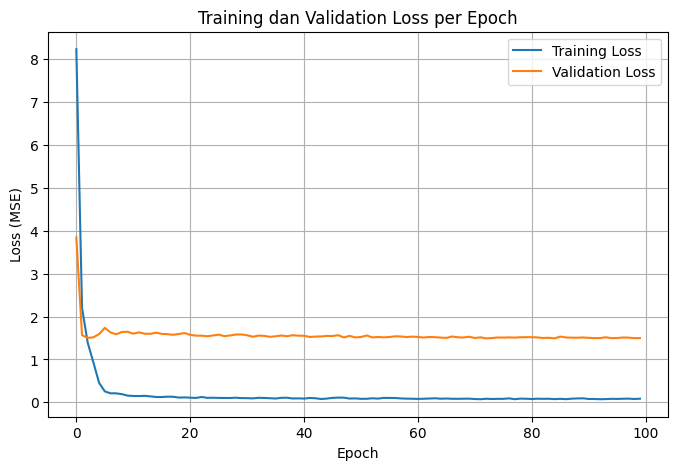

In [36]:
# Plot loss training dan validation
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training dan Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

**Insight :**
- Model functional adalah neural network dengan dua input kategori yang masing-masing melalui embedding 100 dimensi, kemudian digabung dan diproses melalui beberapa dense layer dengan dropout.
- Model juga menggunakan embedding bias untuk output akhir prediksi tunggal.
- Total parameter 195.188, semua dapat dilatih. Setelah 48 epoch, loss menurun signifikan, tapi val_loss stabil di sekitar 1.46–1.60, menunjukkan model sudah mencapai plateau pada validasi.

**Mendapatkan Rekomendasi Produk Fashion**

Sistem rekomendasi ini menggunakan model Neural Collaborative Filtering (NCF) untuk memprediksi rating produk berdasarkan kombinasi brand dan kategori (brand_cat). Pengguna memasukkan brand_cat, lalu sistem menampilkan daftar produk yang sudah pernah dirating serta 5 rekomendasi produk teratas yang belum pernah dirating.

In [37]:
def get_brand_cat_rated_products(brand_cat_id, df):
    # Mendapatkan daftar produk yang sudah pernah dirating oleh brand_cat tertentu (tanpa duplikasi)
    rated_products = df[['brand_cat', 'Product ID']].drop_duplicates()
    rated_products = rated_products[rated_products['brand_cat'] == brand_cat_id]

    # Mengambil detail produk yang sudah dirating brand_cat berdasarkan daftar produk tersebut
    rated_product_details = df[df['Product ID'].isin(rated_products['Product ID'])]
    rated_product_details = rated_product_details[['Product ID', 'Product Name', 'Brand', 'Category', 'Price', 'Rating']]

    # Mengurutkan produk berdasarkan rating tertinggi dan mereset index agar rapi
    rated_product_details = rated_product_details.sort_values(by='Rating', ascending=False).reset_index(drop=True)

    # Mengembalikan dataframe detail produk yang sudah dirating brand_cat
    return rated_product_details

In [38]:
def get_recommendations(brand_cat_id, df, model, brand_cat_encoder, product_encoder, top_n=5):
    # Encode brand_cat_id sekali
    brand_cat_encoded = brand_cat_encoder.transform([brand_cat_id])[0]

    # Ambil semua produk unik dari encoder (bukan dari df)
    product_ids = np.arange(len(product_encoder.classes_))

    # Buat input array numpy dengan bentuk tetap (n_samples, 1)
    brand_cat_input = np.full((len(product_ids), 1), brand_cat_encoded, dtype=np.int32)
    product_input = product_ids.reshape(-1, 1).astype(np.int32)

    # Prediksi dalam batch sekali panggil (hindari retracing)
    predictions = model.predict([brand_cat_input, product_input], verbose=0)

    # Buat DataFrame hasil prediksi
    predicted_ratings_df = pd.DataFrame({
        'product_encoded': product_ids,
        'predicted_rating': predictions.flatten()
    })

    # Filter produk yang sudah dirating oleh brand_cat_id
    rated_products = df[df['brand_cat'] == brand_cat_id]['product_encoded'].unique()
    predicted_ratings_df = predicted_ratings_df[~predicted_ratings_df['product_encoded'].isin(rated_products)]

    # Ambil top N rekomendasi dengan rating prediksi tertinggi
    recommended = predicted_ratings_df.nlargest(top_n, 'predicted_rating')

    # Ambil detail produk rekomendasi
    recommended_products = df[df['product_encoded'].isin(recommended['product_encoded'])]

    return recommended_products[['Product ID', 'Product Name', 'Brand', 'Category', 'Price', 'Rating']]

In [39]:
# Meminta input brand_cat dari pengguna (biasanya berupa string kategori brand)
brand_cat_id = input("Masukkan brand_cat: ")
top_n = 5

# Mengambil produk yang sudah dirating oleh brand_cat tertentu
rated_products = get_brand_cat_rated_products(brand_cat_id, df)
print(f"Produk yang telah diberi rating oleh Brand_Category {brand_cat_id}:")
display(rated_products)

# Mendapatkan rekomendasi produk terbaik untuk brand_cat berdasarkan model
recommended_products = get_recommendations(brand_cat_id, df, model, brand_cat_encoder, product_encoder, top_n)
print(f"Top {top_n} rekomendasi untuk Brand_Category {brand_cat_id}:")
display(recommended_products)

Masukkan brand_cat: Nike - Women's Fashion
Produk yang telah diberi rating oleh Brand_Category Nike - Women's Fashion:


,Product ID,Product Name,Brand,Category,Price,Rating
0,469,Dress,Nike,Women's Fashion,95,4.906296
1,715,Shoes,Nike,Women's Fashion,84,4.868671
2,697,T-shirt,Nike,Women's Fashion,99,4.804098
3,692,Dress,Nike,Women's Fashion,39,4.705355
4,964,Dress,Nike,Women's Fashion,31,4.541802
...,...,...,...,...,...,...
64,495,Jeans,Nike,Women's Fashion,78,1.129654
65,85,Shoes,Nike,Women's Fashion,89,1.107633
66,371,Dress,Nike,Women's Fashion,33,1.081098
67,905,Jeans,Nike,Women's Fashion,83,1.050332


Top 5 rekomendasi untuk Brand_Category Nike - Women's Fashion:


,Product ID,Product Name,Brand,Category,Price,Rating
92,93,Shoes,Nike,Men's Fashion,70,4.928128
229,230,Shoes,Zara,Men's Fashion,82,4.592906
417,418,Jeans,Zara,Men's Fashion,34,4.986091
699,700,Dress,H&M,Women's Fashion,78,4.824649
990,991,Shoes,Nike,Kids' Fashion,25,4.972677


**Insight :**
- Hasil rekomendasi produk menampilkan daftar produk yang telah diberi rating dalam kategori Nike - Women's Fashion, dengan informasi seperti ID produk, nama produk, merek, kategori, harga, dan rating.
- Rekomendasi ini mencakup produk dari berbagai merek dan kategori terkait, seperti sweater Adidas, jeans Zara, t-shirt Adidas, dan sepatu Nike, yang menjadi pilihan utama untuk brand category tersebut.

## ***Evaluasi Model***

Evaluasi dilakukan untuk Content Based Filtering dengan menghitung rata-rata MSE dan RMSE per kategori dengan memanfaatkan cosine similarity untuk menilai kemiripan produk dan relevansi aktual, sehingga fokus pada produk-produk yang paling mirip dalam setiap kategori. Sementara itu, Collaborative Filtering menghitung MSE dan RMSE berdasarkan prediksi rating langsung pada data uji, menggunakan pola perilaku pengguna untuk memprediksi preferensi produk secara keseluruhan.

In [40]:
# Menghitung rata-rata MSE dan RMSE untuk Content Based Filtering
avg_mse, avg_rmse = calculate_mse_rmse_for_all_by_brand_cat(df, cosine_sim)

# Memprediksi rating pada data uji menggunakan model Collaborative Filtering
y_pred = model.predict([X_test[:, 0], X_test[:, 1]])

# Menghitung MSE antara hasil prediksi dan data aktual
mse = mean_squared_error(y_test, y_pred)

# Menampilkan hasil evaluasi Content Based Filtering
print("Evaluasi Content Based Filtering")
print(f"Rata-rata MSE pada seluruh produk: {avg_mse:.4f}")
print(f"Rata-rata RMSE pada seluruh produk: {avg_rmse:.4f}")

# Menampilkan hasil evaluasi Collaborative Filtering
print("\nEvaluasi Collaborative Filtering")
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.4f}')

# Menghitung dan menampilkan RMSE dari model Collaborative Filtering
rmse = math.sqrt(mse)
print(f'RMSE: {rmse:.4f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
Evaluasi Content Based Filtering
Rata-rata MSE pada seluruh produk: 0.0642
Rata-rata RMSE pada seluruh produk: 0.2400

Evaluasi Collaborative Filtering
MSE: 1.4969
RMSE: 1.2235


**Insight :**
- Evaluasi Content Based Filtering menunjukkan rata-rata MSE sebesar 0,0642 dan RMSE 0,2400
- Collaborative Filtering menghasilkan MSE 1,4760 dan RMSE 1,2149.
- Nilai error yang jauh lebih rendah pada Content Based Filtering mengindikasikan performa yang lebih baik dalam merekomendasikan produk yang relevan dan meminimalkan kesalahan prediksi dibandingkan Collaborative Filtering.
- Dengan demikian, Content Based Filtering lebih unggul dalam konteks ini. Namun, Collaborative Filtering tetap memiliki potensi untuk ditingkatkan melalui pengembangan model lebih lanjut.